In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
#import seaborn as sns

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


[Dimension reduction in scikit learn](http://scikit-learn.org/stable/modules/decomposition.html#decompositions)

In [9]:
prevpos_mnsz = pd.read_csv('./dat/preverb-posit-gyakmx-mnsz.tsv', delimiter='\t', index_col=0)
prevpos_regi = pd.read_csv('./dat/preverb-posit-gyakmx.tsv', delimiter='\t', index_col=0)

In [4]:
prevpos.head()#.describe()

,-4,-3,-2,-1,+1,+2,+3,+4,+5,+6,+7,+8,+9,+10,+11
meg,0,15,30680,4022084,1930133,37637,452,54,9,0,1,0,0,0,0
el,0,21,21716,2614517,1305881,28059,610,86,13,6,2,0,0,0,0
ki,0,2,11583,1541336,1054549,18457,447,78,17,8,1,1,1,0,0
be,0,10,10433,1002216,690049,11765,253,36,7,1,0,0,0,0,0
fel,0,3,7412,969637,619035,10591,249,27,5,1,0,0,0,0,0


In [11]:
def postproc_regi(prevpos):
    prevpos['-1'] += prevpos['0']
    prevpos['0'] = 0
    prevpos['6+'] = prevpos.loc[:,'+6':].sum(axis=1)
    prevpos = prevpos.drop(columns=['+6', '+7', '+8'])
    
postproc_regi(prevpos_regi)

TypeError: drop() got an unexpected keyword argument 'columns'

In [12]:
prevpos_regi.head()

,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5,+6,+7,+8,6+
meg,0,0,2,1225,8358,0,3294,98,17,4,4,0,1,0,1
el,0,0,2,767,4302,0,1081,40,5,3,1,0,1,2,3
ki,0,0,1,260,1585,0,478,17,7,2,2,0,1,0,1
fel,0,1,0,185,966,0,403,16,4,2,2,0,0,0,0
be,0,0,0,109,827,0,310,14,2,1,0,0,0,0,0


In [13]:
def show_labed_mx(mutinfo):
    plt.matshow(mutinfo)
    df = mutinfo
    plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
    plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
    plt.colorbar()
    #plt.xticks([int(posi) for posi in mutinfo.columns.tolist()])

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


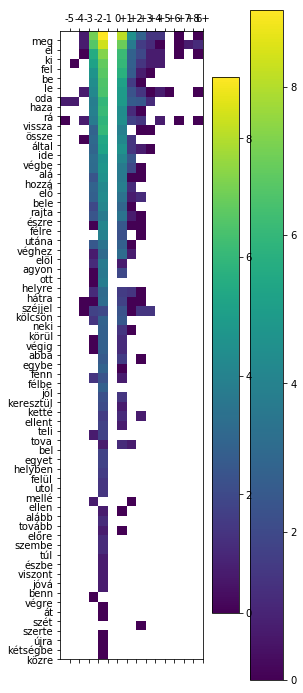

In [15]:
show_labed_mx(np.log(prevpos_regi))
#plt.yticks(prevpos.index.tolist())
plt.colorbar()

In [16]:
def mutinfo(prevpos):
    mutinfo = prevpos.copy()#.values.astype('float')# + 1
    prev_marg = prevpos.sum(axis=1)
    posit_marg = prevpos.sum(axis=0)
    mutinfo = mutinfo.divide(prev_marg, axis='rows')
    mutinfo /= posit_marg#.values
    return np.log(mutinfo)

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


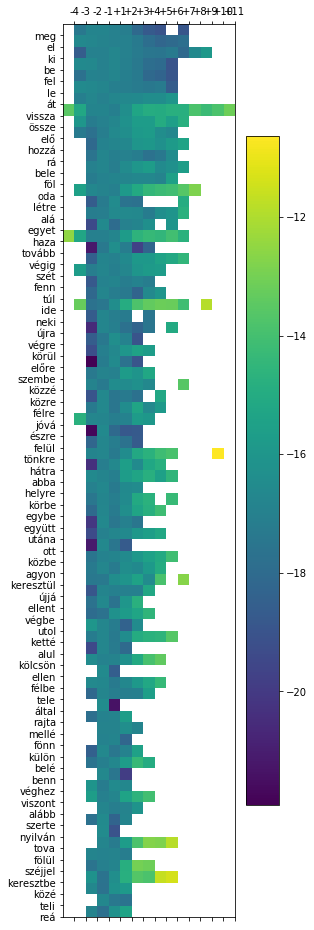

In [18]:
show_labed_mx(mutinfo(prevpos_mnsz))

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


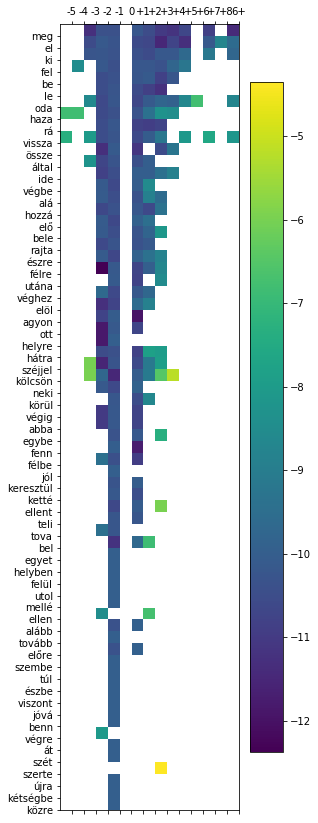

In [19]:
show_labed_mx(mutinfo(prevpos_regi))

In [17]:
prevproj = pca.fit_transform(provpos.values)

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


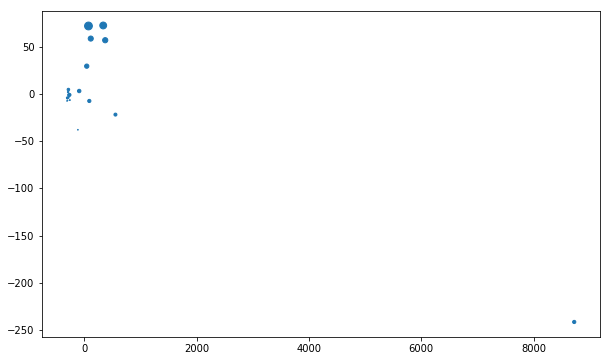

In [23]:
plt.scatter(*prevproj.T)